## SC1015 Project

Why are some songs more popular than others? What makes a song popular? In this project, we utilize the Song Popularity Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict how popular songs are/will be based upon their characteristics. (Testing on songs in the Spotify Music Dataset)
2. Demonstrate how relevant our predictions are in real life by predicting the popularity of songs on the Billboard top 100 and checking whether their popularity is reflected y the predictions of our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Create a dataframe from the dataset

In [202]:
#songdata = pd.read_csv('data/knn_songs.csv', index_col=0)
songdata = pd.read_csv('data/genre_music.csv')
songdata = songdata.sort_values(['track'])
#songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(20)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.94800,9,-5.081,1,0.1360,0.10100,0.001480,0.8740,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.06940,3,-24.330,1,0.9170,0.61100,0.000000,0.1060,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.39100,7,-16.067,1,0.0479,0.88900,0.864000,0.1110,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.97000,8,-4.635,1,0.0789,0.00015,0.005860,0.1410,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.24200,0,-15.141,0,0.0398,0.58400,0.936000,0.1460,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock
2495,"""""Joseph, lieber Joseph mein""""",Traditional,0.282,0.05950,7,-26.589,1,0.0415,0.99300,0.849000,0.1070,0.2010,76.620,110.173,4,32.82781,7,0,60s,rock
6039,"""""Móvil"""" Oil Special",Victor Jara,0.544,0.62900,10,-11.324,1,0.1770,0.86700,0.000006,0.3470,0.5860,108.040,167.834,4,79.72459,7,0,60s,pop
4877,"""""Tragic"""" Overture, Op. 81: Allegro ma non tr...",National Philharmonic Orchestra,0.193,0.12300,2,-16.581,0,0.0397,0.97900,0.881000,0.0848,0.0936,83.204,697.387,4,49.61964,30,0,60s,rock
34927,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,0.858,0.69700,2,-5.361,1,0.2300,0.11400,0.000000,0.2240,0.3640,98.012,290.836,4,38.04379,13,1,10s,rap
6348,' Cello Song,Nick Drake,0.507,0.39000,3,-17.218,1,0.0326,0.65700,0.859000,0.0613,0.5200,118.805,284.987,4,41.96860,11,0,60s,r&b


In [153]:
print("Shape: ", songdata.shape)
songdata.dtypes

Shape:  (6000, 20)


track                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_s          float64
time_signature        int64
chorus_hit          float64
sections              int64
popularity            int64
decade               object
genre                object
dtype: object

In [154]:
songdata.info

<bound method DataFrame.info of                                               track  \
39054            ""Is This My Fate,"" He Asked Them   
19332                       'Til My Baby Comes Home   
30531                     (B) The Decade Of Statues   
26763  (Can't Live Without Your) Love And Affection   
23680       (Friday Afternoon) In a Galaxy Far Away   
...                                             ...   
24843                                  รักเธอได้ไหม   
23920                                      วิมานดิน   
38522                                          穹顶之下   
31872                                      薔薇と彼女の王子   
38777                                           还有谁   

                          artist  danceability  energy  key  loudness  mode  \
39054          Story Of The Year         0.254   0.970    8    -4.635     1   
19332            Luther Vandross         0.804   0.714   11    -6.714     0   
30531  Between The Buried And Me         0.159   0.939    9    -6.044 

### Step 1
Clean the dataset to remove duplicate songs.

Reference: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [203]:
songdata.groupby(['genre']).count()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade
genre,,,,,,,,,,,,,,,,,,,
edm,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
latin,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870
pop,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460
r&b,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040
rap,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364
rock,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850


We can use the _duplicated()_ function to find duplicates in the dataset. As can be seen from the sum, there are 5,765 duplicated rows with the same track variable value.

In [50]:
songdata.track.duplicated().sum()

55

View duplicate rows:

In [51]:
songdata.loc[songdata.track.duplicated(), :]

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
67,Heart Of Stone,The Rolling Stones,0.000238,0.000311,0.000000,0.000389,0.000501,0.000111,1.988001e-04,3.682371e-05,0.000149,0.000345,0.000483,0.000239,0.000257,24.81530,9,1,60s,edm
125,Stay The Night,IMx,0.000369,0.000378,0.000686,0.000194,0.000501,0.000185,1.114485e-05,0.000000e+00,0.000324,0.000442,0.000475,0.000310,0.000343,54.70426,8,1,90s,edm
171,Runaway,Silverstein,0.000288,0.000462,0.000250,0.000157,0.000501,0.000123,1.496021e-06,2.244285e-05,0.000101,0.000160,0.000451,0.000739,0.000343,38.47654,20,0,10s,edm
319,Please Come Home For Christmas,Charles Brown,0.000317,0.000127,0.000250,0.000600,0.000501,0.000109,8.042366e-04,1.224552e-06,0.000131,0.000218,0.000469,0.000241,0.000257,41.85250,9,1,60s,edm
332,Frontbeast,Destruction,0.000277,0.000528,0.000000,0.000110,0.000000,0.000579,3.684830e-08,1.183152e-03,0.000399,0.000277,0.000461,0.000171,0.000343,16.76518,7,0,10s,edm
388,Volcano,Jimmy Buffett,0.000411,0.000253,0.000312,0.000499,0.000501,0.000618,3.333415e-04,2.244285e-09,0.000159,0.000536,0.000459,0.000310,0.000343,43.46763,10,1,80s,edm
499,No One Knows,Queens Of The Stone Age,0.000322,0.000310,0.000000,0.000170,0.000501,0.000176,3.112526e-05,3.725949e-07,0.000588,0.000407,0.000443,0.000393,0.000343,71.13102,10,1,00s,edm
601,The Loco-Motion,Kylie Minogue,0.000472,0.000488,0.000187,0.000181,0.000501,0.000114,3.865557e-04,1.274667e-04,0.000038,0.000465,0.000334,0.000274,0.000343,38.54833,10,1,80s,latin
604,Be With You,Enrique Iglesias,0.000435,0.000465,0.000062,0.000189,0.000000,0.000100,3.604506e-05,1.836828e-06,0.000056,0.000342,0.000316,0.000311,0.000343,42.31468,9,1,00s,latin
757,Live Like We're Dying,Kris Allen,0.000371,0.000477,0.000000,0.000102,0.000501,0.000120,2.741031e-05,0.000000e+00,0.000550,0.000572,0.000238,0.000300,0.000343,35.05636,10,1,10s,latin


Finally, to drop the duplicate rows, we can use the _drop_duplicates()_ function to drop the rows with duplicates from the dataframe. We set `keep` to `first` to keep only the first occurrence of the row, and set `inplace=True` to update the original dataframe. 

In [193]:
songdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (8703, 20)


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.611,0.000,0.106,0.319,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.889,0.864,0.111,0.181,59.801,226.310,4,38.29173,10,0,80s,rock
2495,"""""Joseph, lieber Joseph mein""""",Traditional,0.282,0.0595,7,-26.589,1,0.0415,0.993,0.849,0.107,0.201,76.620,110.173,4,32.82781,7,0,60s,rock
4712,''Bang Bang'' (My Baby Shot Me Down),The Bonzo Dog Band,0.429,0.4730,7,-9.188,0,0.0310,0.605,0.000,0.138,0.409,170.416,160.053,4,38.98600,9,0,60s,edm
34500,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.6750,9,-5.148,0,0.3130,0.228,0.000,0.150,0.328,89.642,205.560,4,35.32814,8,1,00s,rap


We have about 2945 unique songs. We can probably parse the song name and categorized it by language as well.

### Step 2
Perform exploratory analysis on the acoustic data of the songs.

> Use the following code to identify other non-English languages in Song Name among the 13070 records

In [70]:
songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(50)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
693,"Boom, Boom, Boom, Boom!!",Vengaboys,0.000504,0.000477,0.000374,0.000254,0.000000,0.000121,1.084364e-05,9.521870e-04,0.000046,0.000589,0.000359,0.000285,0.000343,26.26083,9,1,90s,latin
2776,"The Rock, Op. 7",Sergei Rachmaninoff,0.000058,0.000050,0.000562,0.000744,0.000501,0.000122,9.076528e-04,1.477306e-03,0.000240,0.000023,0.000200,0.001284,0.000257,43.91369,35,0,90s,rock
2778,Fell from the Sun,Pale Saints,0.000125,0.000314,0.000000,0.000508,0.000501,0.000115,2.339415e-08,1.627652e-03,0.000543,0.000291,0.000273,0.000403,0.000343,26.24685,12,0,90s,rock
2779,Nothing Else Matters,Apocalyptica,0.000218,0.000106,0.000125,0.000422,0.000000,0.000101,5.682871e-04,1.945773e-03,0.000154,0.000099,0.000358,0.000403,0.000257,30.88480,14,0,90s,rock
2268,Chief Rocka,Lords Of The Underground,0.000561,0.000382,0.000062,0.000334,0.000501,0.000897,1.747031e-04,1.283383e-06,0.000105,0.000399,0.000259,0.000349,0.000343,43.71556,10,1,90s,rap
1211,When The Sun Sets Down South,Sidney Bechet,0.000321,0.000163,0.000312,0.000390,0.000000,0.000137,9.146811e-04,8.584936e-04,0.000127,0.000332,0.000296,0.000266,0.000343,27.81116,13,0,90s,pop
1212,"Lieutenant Kijé, Op. 60: IV. Troika",Sergei Prokofiev,0.000259,0.000108,0.000437,0.000552,0.000501,0.000108,9.397821e-04,1.344392e-03,0.000196,0.000172,0.000359,0.000262,0.000343,56.32113,8,0,90s,pop
323,Good Enough,Sarah McLachlan,0.000325,0.000238,0.000562,0.000265,0.000501,0.000083,4.598507e-04,1.150469e-06,0.000170,0.000283,0.000456,0.000429,0.000343,36.02439,12,1,90s,edm
2784,Pink Moon,Sebadoh,0.000141,0.000490,0.000125,0.000255,0.000501,0.000171,3.072365e-08,1.514348e-03,0.000433,0.000146,0.000381,0.000172,0.000429,56.48350,5,0,90s,rock
1922,Foolish Heart,Sharon Bryant,0.000405,0.000224,0.000062,0.000435,0.000501,0.000096,4.829436e-04,0.000000e+00,0.000084,0.000460,0.000248,0.000395,0.000343,46.68056,10,1,90s,r&b


In [54]:
# Summary Statistics for numeric Variables
songdata.describe().round(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity
count,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.000,2945.0,2945.000,2945.000,2945.000
mean,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,39.395,10.647,0.494
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.0,18.263,5.931,0.500
min,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,2.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,27.167,8.000,0.000
50%,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,35.401,10.000,0.000
75%,0.000,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.0,46.861,12.000,1.000
max,0.001,0.001,0.001,0.001,0.001,0.003,0.001,0.002,0.002,0.001,0.001,0.006,0.0,172.911,169.000,1.000


In [90]:
songdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2945 entries, 1 to 3000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2945 non-null   float64
 1   energy            2945 non-null   float64
 2   key               2945 non-null   float64
 3   loudness          2945 non-null   float64
 4   mode              2945 non-null   float64
 5   speechiness       2945 non-null   float64
 6   acousticness      2945 non-null   float64
 7   instrumentalness  2945 non-null   float64
 8   liveness          2945 non-null   float64
 9   valence           2945 non-null   float64
 10  tempo             2945 non-null   float64
 11  duration_s        2945 non-null   float64
 12  chorus_hit        2945 non-null   float64
dtypes: float64(13)
memory usage: 322.1 KB


Sequence of Box Plots: 
2 )  danceability
Number of outliers =  1 

3 )  energy
Number of outliers =  0 

4 )  key
Number of outliers =  0 

5 )  loudness
Number of outliers =  1192 

6 )  mode
Number of outliers =  0 

7 )  speechiness
Number of outliers =  4391 

8 )  acousticness
Number of outliers =  0 

9 )  instrumentalness
Number of outliers =  7738 

10 )  liveness
Number of outliers =  2348 

11 )  valence
Number of outliers =  0 

12 )  tempo
Number of outliers =  369 

13 )  duration_s
Number of outliers =  1753 

14 )  time_signature
Number of outliers =  4315 

15 )  chorus_hit
Number of outliers =  1601 

16 )  sections
Number of outliers =  1438 

17 )  popularity
Number of outliers =  0 



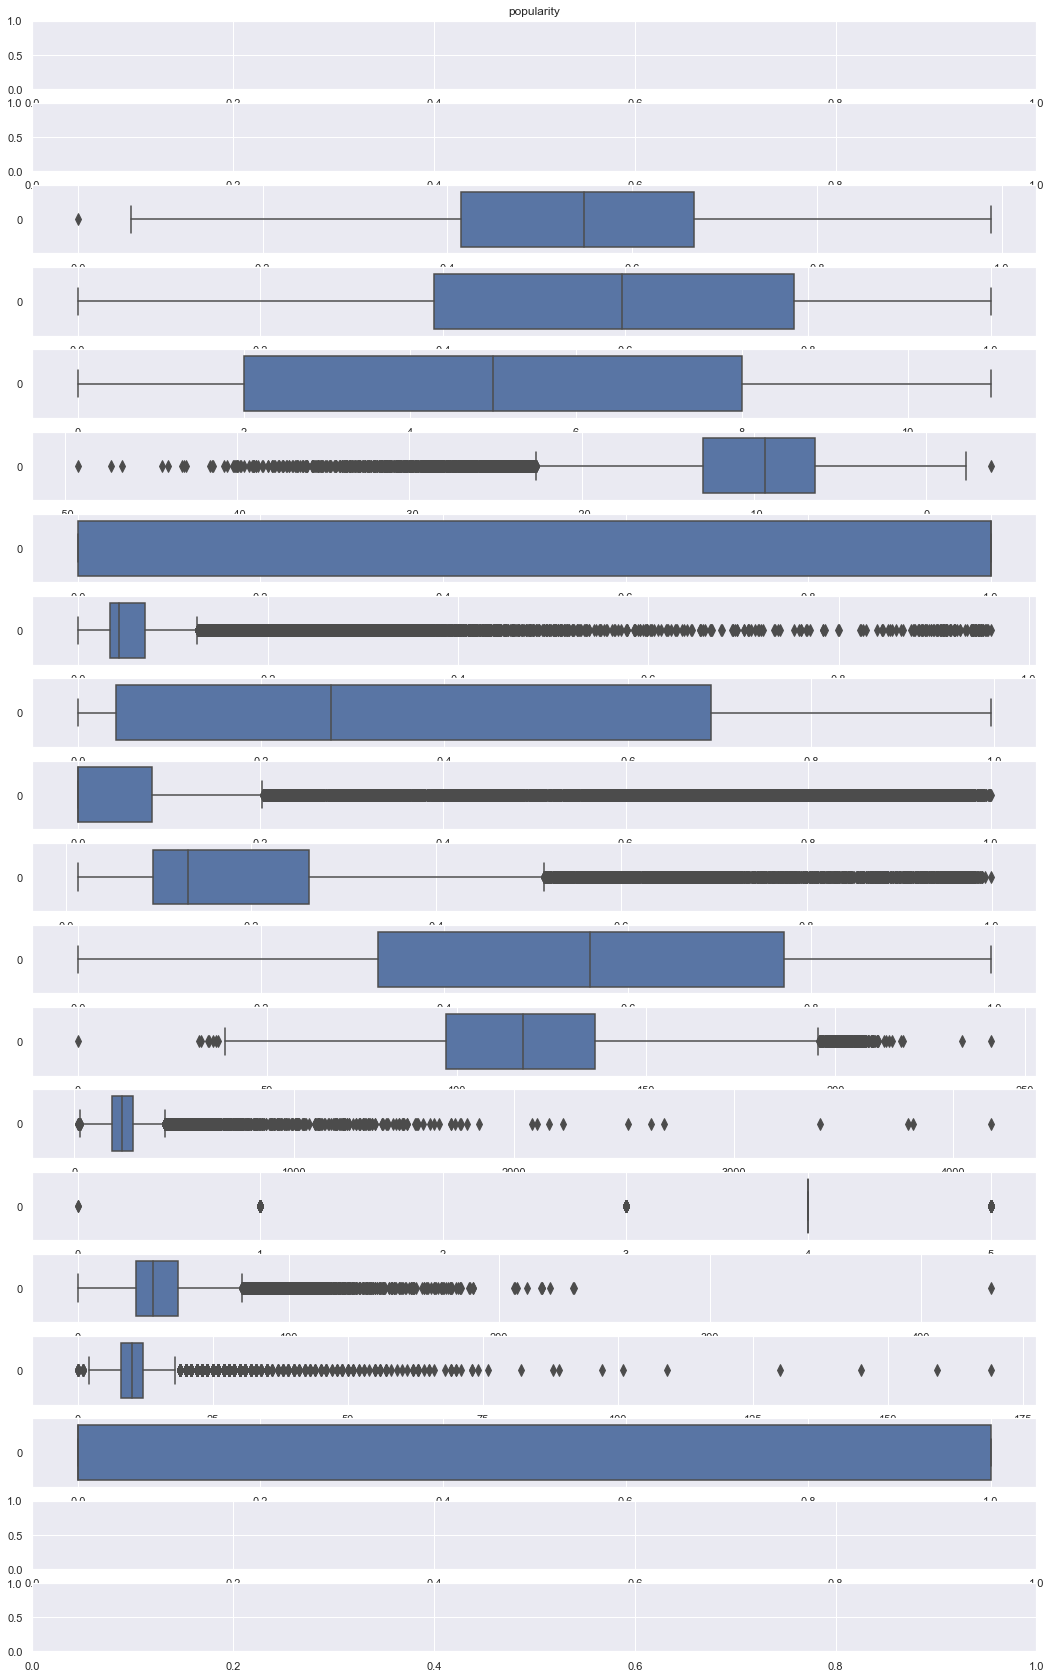

In [121]:
# Draw the box-plot distribution of all 14 numeric variables

# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats  
f, axes = plt.subplots(20, 1, figsize=(18, 30))

count = 0

print("Sequence of Box Plots: ")
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        #print(var)
        print(count, ") ", var)
        print("Number of outliers = ", len(boxplot_stats(songdata[var]).pop(0)['fliers']), "\n")
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count], fliersize = 8.0)
        axes[0].set_title(var)
    count += 1

#sb.boxplot(data = songdata['danceability'], orient = "h", ax = axes[0], fliersize = 8.0)
#axes[0].set_title('danceability')

#sb.boxplot(data = songdata['energy'], orient = "h", ax = axes[1], fliersize = 8.0)
#axes[0].set_title('energy')


Sequence of Plots: 
0 )  danceability
Skewness: -0.232
Kurtosis: -0.447
1 )  energy
Skewness: -0.299
Kurtosis: -0.823
2 )  key
Skewness: 0.014
Kurtosis: -1.279
3 )  loudness
Skewness: -1.403
Kurtosis: 3.215
4 )  mode
Skewness: -0.837
Kurtosis: -1.300
5 )  speechiness
Skewness: 4.634
Kurtosis: 30.470
6 )  acousticness
Skewness: 0.447
Kurtosis: -1.292
7 )  instrumentalness
Skewness: 1.671
Kurtosis: 1.083
8 )  liveness
Skewness: 2.108
Kurtosis: 4.826
9 )  valence
Skewness: -0.185
Kurtosis: -1.061
10 )  tempo
Skewness: 0.476
Kurtosis: -0.077
11 )  duration_s
Skewness: 6.885
Kurtosis: 120.993
12 )  time_signature
Skewness: -3.506
Kurtosis: 19.153
13 )  chorus_hit
Skewness: 2.214
Kurtosis: 12.594
14 )  sections
Skewness: 6.184
Kurtosis: 106.539
15 )  popularity


IndexError: index 15 is out of bounds for axis 0 with size 15

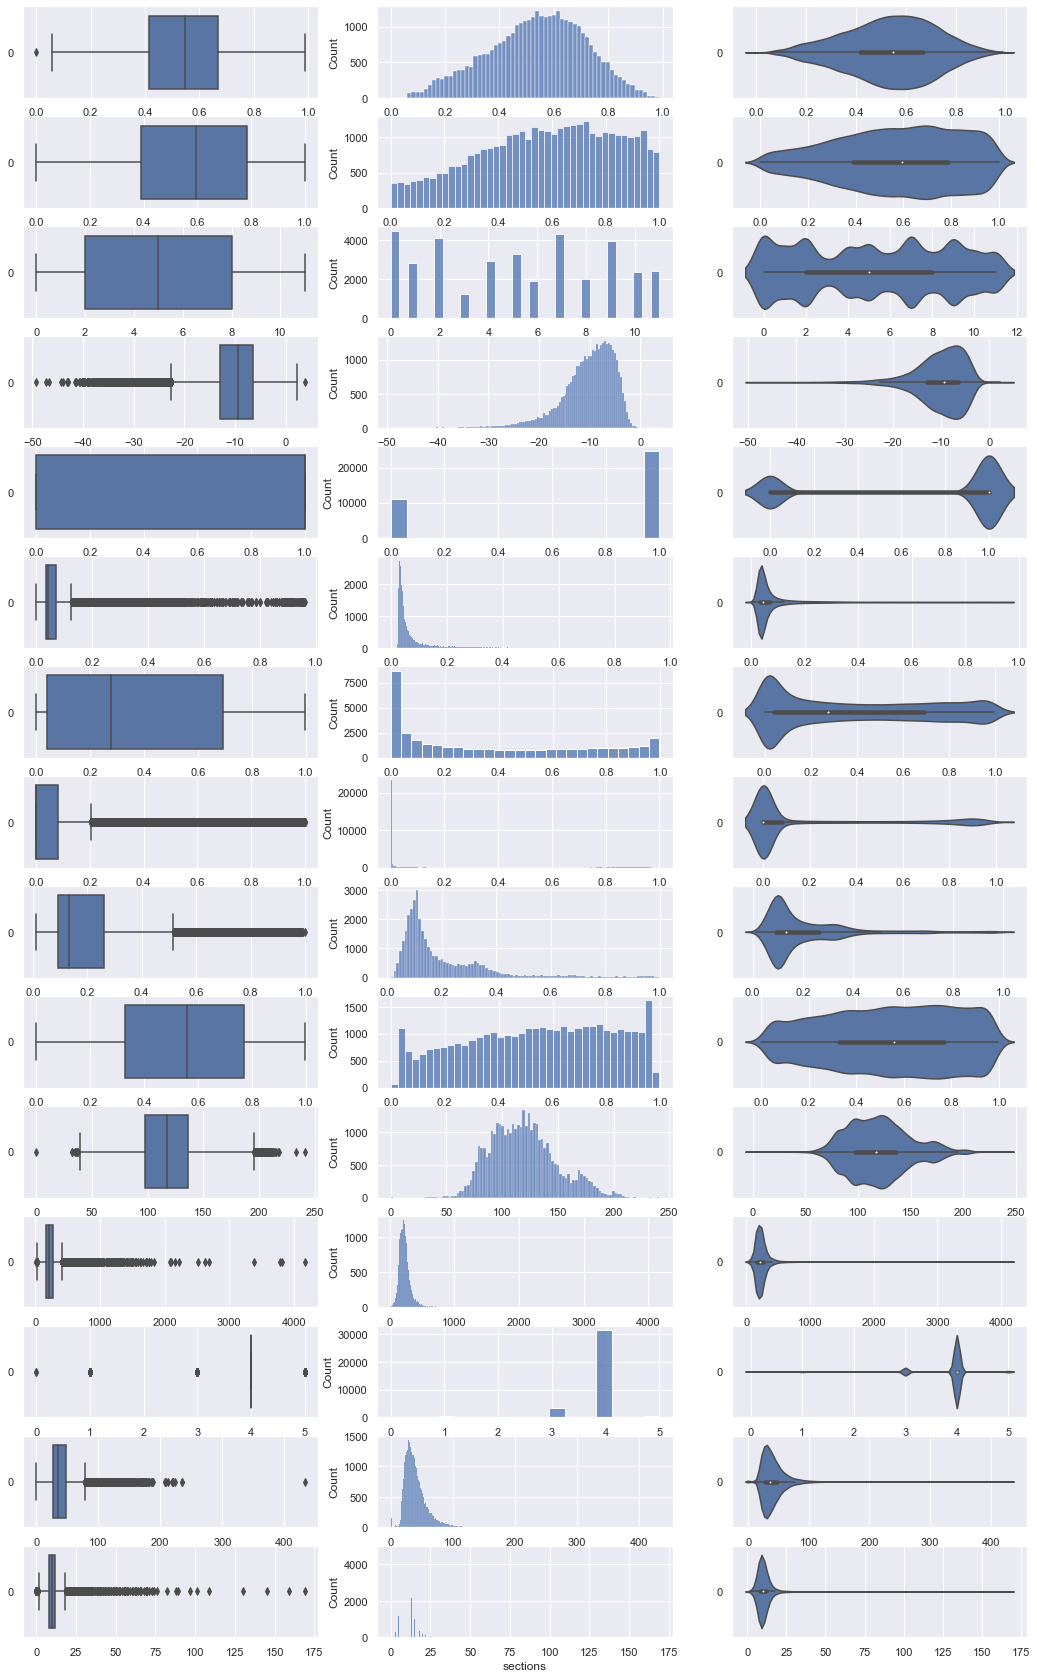

In [122]:
# Draw the histogram & violin plot distributions of all 4 variables
f, axes = plt.subplots(15, 3, figsize=(18, 30))

print("Sequence of Plots: ")
count = 0
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        print(count, ") ", var)
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = songdata[var], ax = axes[count,1])
        sb.violinplot(data = songdata[var], orient = "h", ax = axes[count,2])
        count += 1

        print("Skewness: {:.3f}".format(songdata[var].skew()))
        print("Kurtosis: {:.3f}".format(songdata[var].kurt()))

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.202876  0.015960  0.276008 -0.025606   
energy                0.202876  1.000000  0.022746  0.773963 -0.031625   
key                   0.015960  0.022746  1.000000  0.006417 -0.140968   
loudness              0.276008  0.773963  0.006417  1.000000  0.003236   
mode                 -0.025606 -0.031625 -0.140968  0.003236  1.000000   
speechiness           0.157710  0.118546  0.021144  0.065394 -0.055646   
acousticness         -0.255106 -0.714257 -0.024549 -0.563425  0.047883   
instrumentalness     -0.305889 -0.206477 -0.013198 -0.372896 -0.077838   
liveness             -0.118401  0.159368  0.003010  0.089032  0.010002   
valence               0.559605  0.342329  0.010134  0.282093  0.038882   
tempo                -0.059319  0.224987  0.003116  0.172363  0.028212   
duration_s           -0.068065  0.012294  0.014861 -0.049583 -0.073726   
time_signature        0.187957  0.1985

<AxesSubplot:>

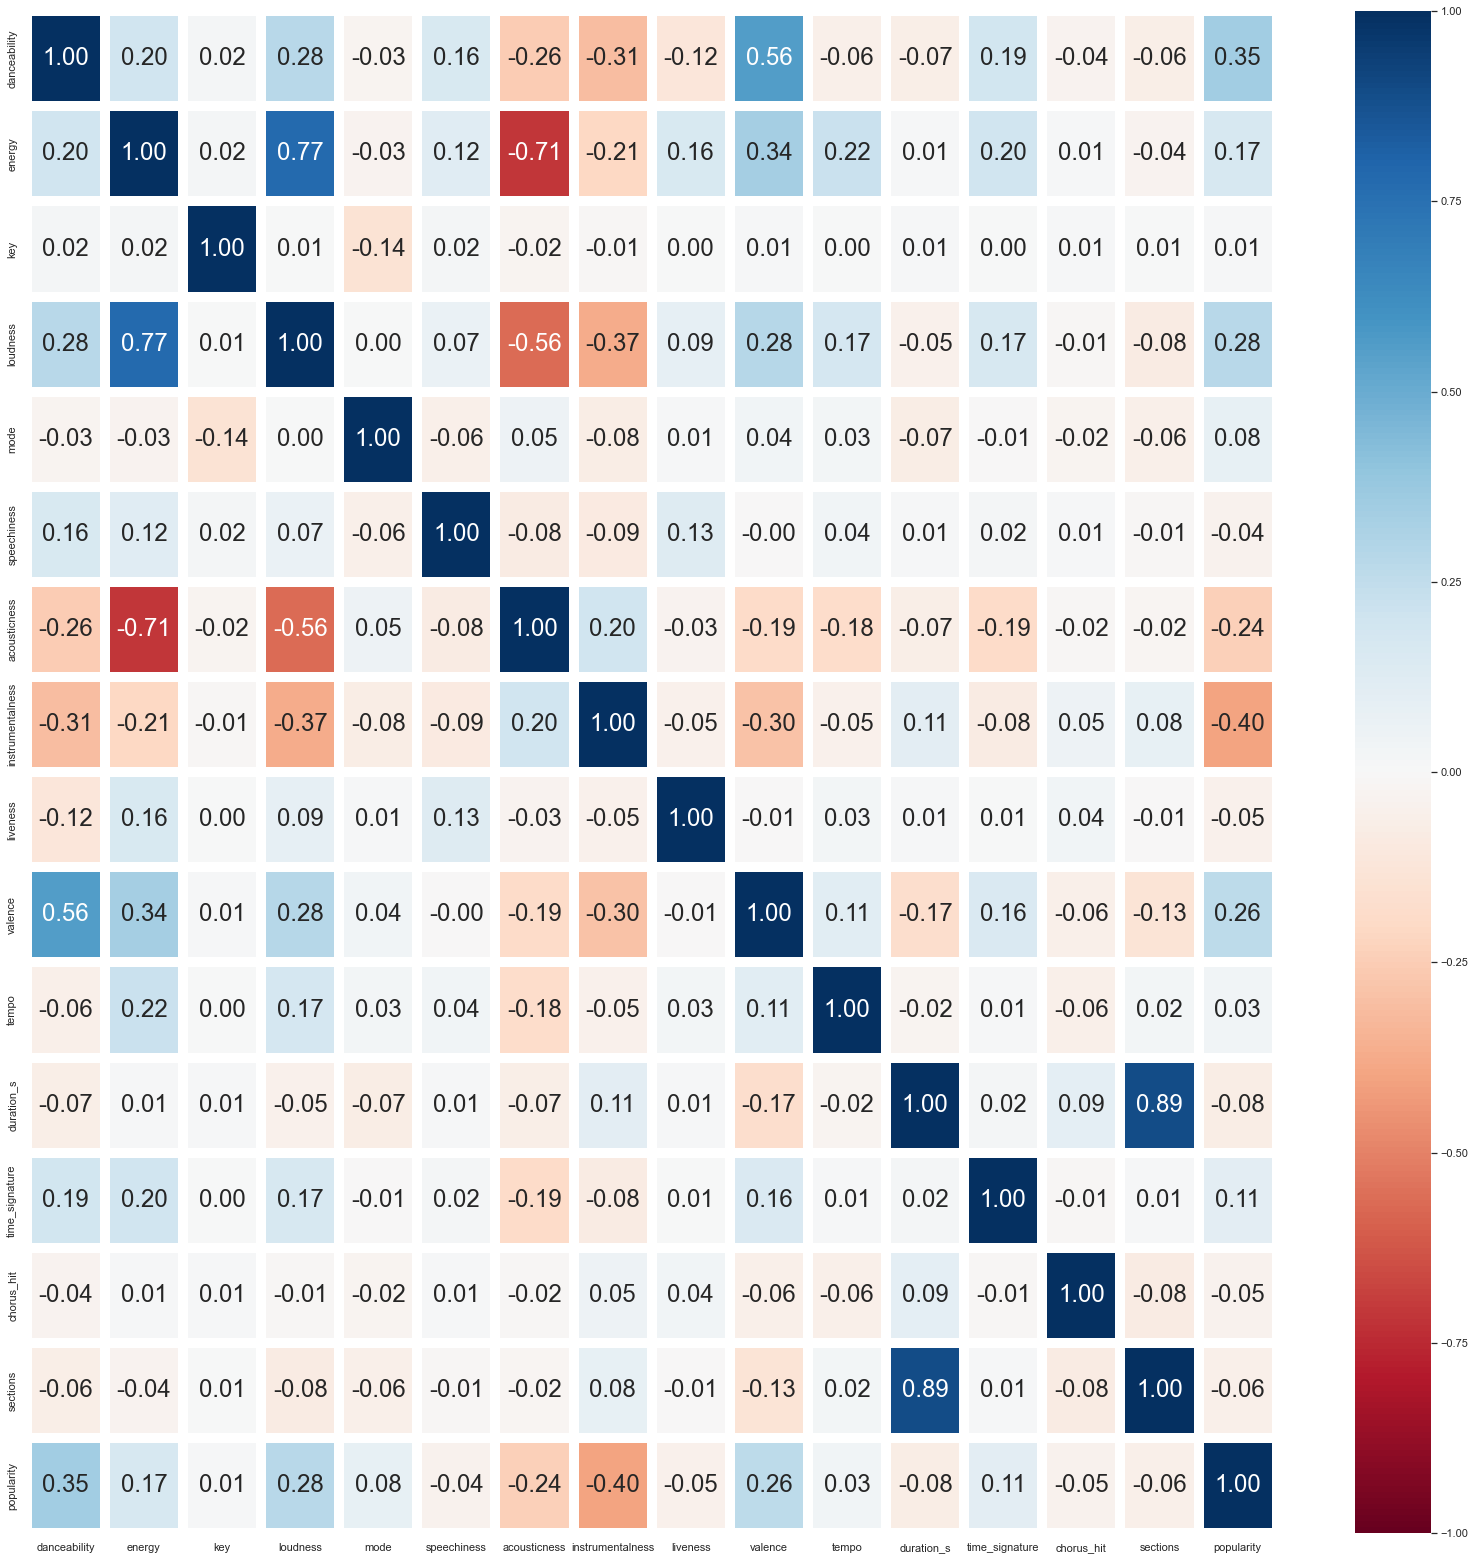

In [123]:
# Correlation Matrix
print(songdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(28, 28))
sb.heatmap(songdata.corr(), vmin = -1, vmax = 1, linewidths = 10,
           annot = True, fmt = ".2f", annot_kws = {"size": 24}, cmap = "RdBu")

Let's try to plot the scatter plots of Song Popularity against Instrumentalness and Danceability

Text(0, 0.5, 'Song Popularity')

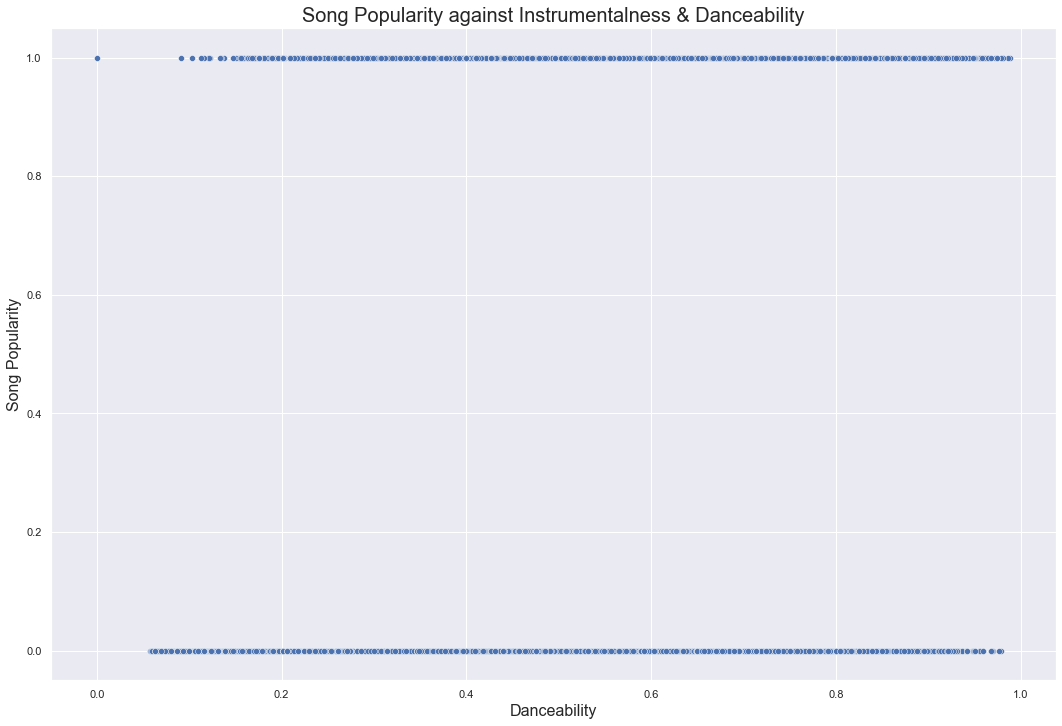

In [124]:
f, ax = plt.subplots(figsize=(18,12))
# = sb.scatterplot(x = "instrumentalness", y = "song_popularity", hue="danceability", data = songdata, palette="Greens", size="danceability")
ax = sb.scatterplot(x = "danceability", y = "popularity", data = songdata)

#ax.legend(loc='upper right')
ax.set_title('Song Popularity against Instrumentalness & Danceability', fontsize = 20, loc='center')
#ax.set_xlabel('Instrumentalness', fontsize = 16)
ax.set_xlabel('Danceability', fontsize = 16)
ax.set_ylabel('Song Popularity', fontsize = 16)

### Since no clear correlation is found on univariate linear regression, we use Feedforward Neural Network (Multi-layer Perceptron)


... results are as follows

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the song_popularity values and label encode them.

In [204]:
popularity_class = []

#for var in songdata['song_popularity']:
#   if(0 <= var and var <= 50):
#        popularity_class.append(0)
#    else:
#        popularity_class.append(1)

#songdata['popularity_class'] = popularity_class
#songdata.head()

from sklearn.preprocessing import LabelEncoder

# label encoding song_popularity
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,5
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,4
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,5
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,5
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,5


We now need to scale the predictor variables so that they can be used together to predict the popularity_class.

In [205]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']])

response = pd.DataFrame(songdata[['genre']])
predictor = songdata
predictor.drop(columns=['popularity', 'track', 'artist', 'genre', 'decade', 'time_signature', 'sections'], inplace=True)
predictor.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.546238,0.579438,5.213752,0.736486,0.693375,0.075992,0.365694,0.154403,0.191211,0.544629,0.494304,234.875505,0.092587
std,0.179968,0.252692,3.535060,0.100218,0.461098,0.089694,0.340269,0.303518,0.175413,0.268407,0.120532,118.969563,0.043877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000
25%,0.425101,0.395848,2.000000,0.687520,0.000000,0.035104,0.039558,0.000000,0.082150,0.331325,0.403423,172.916500,0.063713
50%,0.558704,0.600900,5.000000,0.754684,1.000000,0.045208,0.259036,0.000120,0.120690,0.561245,0.486963,217.907000,0.082760
75%,0.677126,0.786947,8.000000,0.809065,1.000000,0.072708,0.678715,0.061200,0.251521,0.771084,0.565365,266.773000,0.109947
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,1.000000


In [206]:
print(response)

       genre
11343      5
4669       4
21253      5
39054      5
15187      5
...      ...
34817      1
31872      0
38777      0
32309      5
40103      5

[41099 rows x 1 columns]


Note that we are using the 'adam' solver, which is optimised for large datasets. MLPClassifier uses cross entropy loss, which measures the performance of a classification model whose output is a probability value between 0 and 1, so we scaled the song_popularity values to within the range of 0 - 1 instead of 0 - 100 (which we did using the MinMaxScaler). A batch size of 258 and max_iter 1000 seems to yield the best results (0.7970543228768171).

In [207]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

X_train, X_test, y_train, y_test = train_test_split(predictor, response, random_state=21, test_size=0.20)

#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(15, 8, 5), max_iter=1000,activation = 'relu',solver='adam',batch_size=258,random_state=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

D:\python\miniconda\envs\jupyter-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier :  0.8666017822926488


Try plotting the correlation matrix.

<AxesSubplot:>

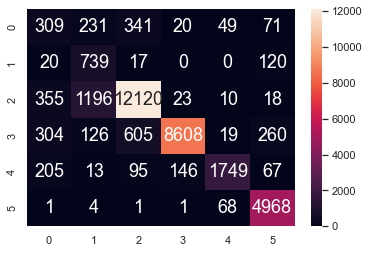

In [208]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [201]:
# scale the response variable for test and predict
#y_test_minmax = MinMaxScaler().fit_transform(y_test)
#y_test_minmax = y_test_minmax.astype('int64')
#y_test_normalized = (y_test-y_test.min())/(y_test.max()-y_test.min())
y_test_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.6163124641010913
